# 基尼系数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Gini(x):
    return 1-(x**2)-(1-x)**2

In [7]:
X=np.linspace(0,1,200)
y=Gini(X)

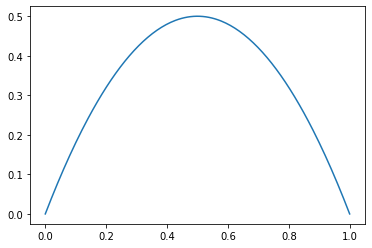

In [10]:
plt.plot(X,y)
plt.show()

# 使用基尼系数进行决策树划分

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:iris.data.shape[1]]#取后两个特征
y = iris.target

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion="gini")#树最大深度为2
dt_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
def plot_decision_boundry(model,axis):#axis是坐标轴范围
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),#x轴划分为很多小的点用最大值减最小值*100这么多样本点
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))#将y轴划分为很多小的点
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]#按行连接两个矩阵
    y_predict=model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9a','#fff59d','#90caf9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)#可选参数linwidth

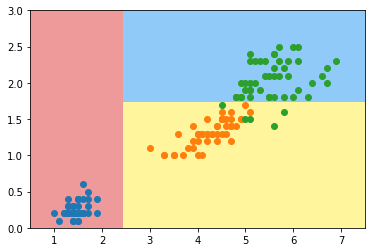

In [17]:
plot_decision_boundry(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()#以基尼系数绘制结果如下

# 模拟使用基尼系数划分

In [25]:
from collections import Counter
from math import log
def split(X,y,d,value):#根据value对d特征对应的列进行划分进行划分
    index_a = (X[:,d]<=value)
    index_b = (X[:,d]>value)
    return X[index_a],X[index_b],y[index_a],y[index_b]
def gini(y):#y可以标识数据分成了哪些类别
    counter = Counter(y)#Counter类已经按照类的不同进行计数并形成字典
    #print(counter.values())
    res = 1.0
    for num in counter.values():
        p = num/len(y)#概率计算
        res -= p**2#计算基尼系数
    return res
def try_split(X,y):
    best_g=float('inf')
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):#对于每个维度进行搜索
        sorted_index=np.argsort(X[:,d])#进行索引排序 
        for i in range(1,X.shape[0]):#对每个样本进行遍历
            #索引i-1和i个的第d维
            if X[sorted_index[i-1],d] !=X[sorted_index[i],d]:
                v=(X[sorted_index[i-1],d]+X[sorted_index[i],d])/2#用平均值作为划分候选阈值
                X_l,X_r,y_l,y_r=split(X,y,d,v)
                g = gini(y_l)+gini(y_r)#调用计算左右子树基尼系数
                if g < best_g:
                    best_g,best_d,best_v = g,d,v
    return best_g,best_d,best_v

In [27]:
best_g,best_d,best_v=try_split(X,y)
print("best g",best_g)
print("best dimension",best_d)
print("best threshold",best_v)#与上面对应的决策边界一致

best g 0.5
best dimension 0
best threshold 2.45


In [28]:
X1_l,X1_r,y1_l,y1_r=split(X,y,best_d,best_v)#真正进行划分

In [30]:
gini(y1_l)#2.45左侧所有点都是蓝色且都被包含在内

0.0

In [31]:
gini(y1_r)

0.5

In [33]:
best_g2,best_d2,best_v2=try_split(X1_r,y1_r)#对右侧的树进行划分
print("best g",best_g2)
print("best dimension",best_d2)
print("best threshold",best_v2)#与上面对应的决策边界一致，在第一个维度的1.75处进行划分

best g 0.2105714900645938
best dimension 1
best threshold 1.75


In [35]:
X2_l,X2_r,y2_l,y2_r=split(X1_r,y1_r,best_d2,best_v2)#真正进行划分

In [36]:
gini(y2_r)

0.04253308128544431

In [37]:
gini(y2_l)

0.1680384087791495